In [2]:
from tensorflow.keras import datasets
from keras.utils import np_utils

#데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(y_train[:5])

#원핫인코딩
y_train = np_utils.to_categorical(y_train)
print(y_train[:5])
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape

# -1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

# 분류 DNN모델 구현 함수
def make_model(input_number, layers, output_number):
    #모델 초기화
    model = Sequential()
    #입력층
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,),name='Hidden-1'))
    #첫번째 은닉층
    model.add(Dense(layers[1], activation='relu', name='Hidden-2'))
    #두번째 은닉층
    model.add(Dense(layers[2], activation='relu', name='Hidden-3'))
    #드롭아웃 계층 : 확률 p를 통해 출력 노드의 신호를 보내거나 보내지 않음
    #과적합 방지
    # 20%의 출력을 off함
    model.add(Dropout(0.2))
    #출력층
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
input_number = 784 # 28 X 28
#은닉계층 3개, 은닉노드수 128개, 68개, 32개
hidden_layers = [128, 64, 32]
print(hidden_layers)
number_of_class = 10
output_number = number_of_class
#모델 생성
model = make_model(input_number, hidden_layers, output_number)

[128, 64, 32]


In [5]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 4s 5ms/step - loss: 0.4582 - accuracy: 0.8640 - val_loss: 0.1564 - val_accuracy: 0.9546
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1793 - accuracy: 0.9485 - val_loss: 0.1318 - val_accuracy: 0.9607
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9644 - val_loss: 0.1221 - val_accuracy: 0.9625
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0944 - accuracy: 0.9723 - val_loss: 0.0992 - val_accuracy: 0.9718
Epoch 5/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0791 - accuracy: 0.9779 - val_loss: 0.1070 - val_accuracy: 0.9687


In [6]:
#모델 평가
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Loss, Accuracy:', performance_test)

100/100 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9732
Loss, Accuracy: [0.08994831144809723, 0.9732000231742859]


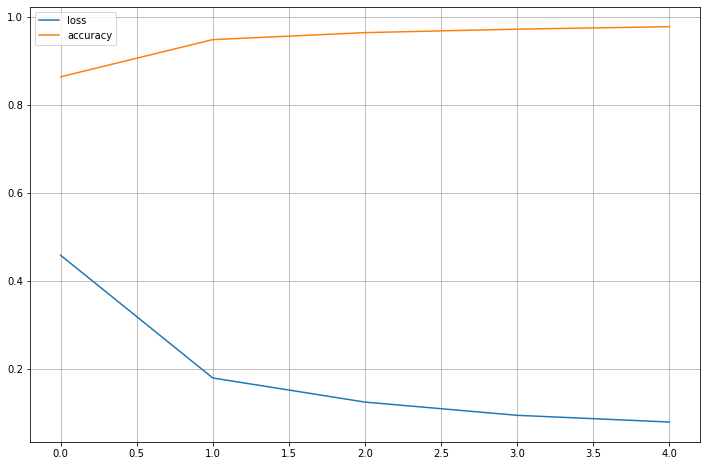

In [8]:
#모델 학습과정 표시
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 128)               100480    
                                                                 
 Hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 Hidden-3 (Dense)            (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
